In [35]:
!pip install nltk seaborn
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

You should consider upgrading via the '/Users/spider/.local/share/virtualenvs/DRKG_OPENPREDICT-jHqmHELr/bin/python -m pip install --upgrade pip' command.


[nltk_data] Downloading package punkt to /Users/spider/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/spider/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/spider/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix

import string
import nltk 

from nltk.corpus import stopwords
stopword_list=stopwords.words('english')


In [37]:
df=pd.read_csv('input/justice.csv',index_col=0)

In [38]:
# Just for visuals
pd.set_option('display.max_colwidth', None)

In [39]:

df.head()

,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,50606,Roe v. Wade,https://api.oyez.org/cases/1971/70-18,70-18,1971,Jane Roe,Henry Wade,"<p>In 1970, Jane Roe (a fictional name used in court documents to protect the plaintiff’s identity) filed a lawsuit against Henry Wade, the district attorney of Dallas County, Texas, where she resided, challenging a Texas law making abortion illegal except by a doctor’s orders to save a woman’s life. In her lawsuit, Roe alleged that the state laws were unconstitutionally vague and abridged her right of personal privacy, protected by the First, Fourth, Fifth, Ninth, and Fourteenth Amendments.</p>\n",501,7,2,True,majority opinion,reversed,NaN
1,50613,Stanley v. Illinois,https://api.oyez.org/cases/1971/70-5014,70-5014,1971,"Peter Stanley, Sr.",Illinois,"<p>Joan Stanley had three children with Peter Stanley. The Stanleys never married, but lived together off and on for 18 years. When Joan died, the State of Illinois took the children. Under Illinois law, unwed fathers were presumed unfit parents regardless of their actual fitness and their children became wards of the state. Peter appealed the decision, arguing that the Illinois law violated the Equal Protection Clause of the Fourteenth Amendment because unwed mothers were not deprived of their children without a showing that they were actually unfit parents. The Illinois Supreme Court rejected Stanley’s Equal Protection claim, holding that his actual fitness as a parent was irrelevant because he and the children’s mother were unmarried.</p>\n",757,5,2,True,majority opinion,reversed/remanded,Civil Rights
2,50623,Giglio v. United States,https://api.oyez.org/cases/1971/70-29,70-29,1971,John Giglio,United States,"<p>John Giglio was convicted of passing forged money orders. While his appeal to the U.S. Court of Appeals for the Second Circuit was pending, Giglio’s counsel discovered new evidence. The evidence indicated that the prosecution failed to disclose that it promised a key witness immunity from prosecution in exchange for testimony against Giglio. The district court denied Giglio’s motion for a new trial, finding that the error did not affect the verdict. The Court of Appeals affirmed.</p>\n",495,7,0,True,majority opinion,reversed/remanded,Due Process
3,50632,Reed v. Reed,https://api.oyez.org/cases/1971/70-4,70-4,1971,Sally Reed,Cecil Reed,"<p>The Idaho Probate Code specified that ""males must be preferred to females"" in appointing administrators of estates. After the death of their adopted son, both Sally and Cecil Reed sought to be named the administrator of their son's estate (the Reeds were separated). According to the Probate Code, Cecil was appointed administrator and Sally challenged the law in court.</p>\n",378,7,0,True,majority opinion,reversed/remanded,Civil Rights
4,50643,Miller v. California,https://api.oyez.org/cases/1971/70-73,70-73,1971,Marvin Miller,California,"<p>Miller, after conducting a mass mailing campaign to advertise the sale of ""adult"" material, was convicted of violating a California statute prohibiting the distribution of obscene material. Some unwilling recipients of Miller's brochures complained to the police, initiating the legal proceedings.</p>\n",305,5,4,True,majority opinion,vacated/remanded,First Amendment


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3303 entries, 0 to 3302
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  3303 non-null   int64 
 1   name                3303 non-null   object
 2   href                3303 non-null   object
 3   docket              3303 non-null   object
 4   term                3303 non-null   object
 5   first_party         3302 non-null   object
 6   second_party        3302 non-null   object
 7   facts               3303 non-null   object
 8   facts_len           3303 non-null   int64 
 9   majority_vote       3303 non-null   int64 
 10  minority_vote       3303 non-null   int64 
 11  first_party_winner  3288 non-null   object
 12  decision_type       3296 non-null   object
 13  disposition         3231 non-null   object
 14  issue_area          3161 non-null   object
dtypes: int64(4), object(11)
memory usage: 412.9+ KB


In [41]:
df['name'].value_counts()

Johnson v. United States                5
United States v. California             4
Johnson v. California                   3
United States v. Miller                 3
Davis v. United States                  3
                                       ..
Bogan v. Scott-Harris                   1
Geissal v. Moore Medical Corporation    1
Pfaff v. Wells Electronics, Inc.        1
O'Sullivan v. Boerckel                  1
PennEast Pipeline Co. v. New Jersey     1
Name: name, Length: 3240, dtype: int64

In [42]:
df.shape

(3303, 15)

In [43]:
df.isnull().sum()

ID                      0
name                    0
href                    0
docket                  0
term                    0
first_party             1
second_party            1
facts                   0
facts_len               0
majority_vote           0
minority_vote           0
first_party_winner     15
decision_type           7
disposition            72
issue_area            142
dtype: int64

In [44]:
df.describe()

,ID,facts_len,majority_vote,minority_vote
count,3303.000000,3303.000000,3303.000000,3303.000000
mean,56336.505298,1112.496821,7.009688,1.727823
std,3600.259018,531.514960,1.726244,1.604460
min,50606.000000,26.000000,0.000000,0.000000
25%,54339.500000,757.000000,5.000000,0.000000
50%,55260.000000,1049.000000,7.000000,2.000000
75%,59437.500000,1381.000000,9.000000,3.000000
max,63335.000000,6201.000000,9.000000,4.000000


In [45]:
df.columns

Index(['ID', 'name', 'href', 'docket', 'term', 'first_party', 'second_party',
       'facts', 'facts_len', 'majority_vote', 'minority_vote',
       'first_party_winner', 'decision_type', 'disposition', 'issue_area'],
      dtype='object')

In [46]:
import_feature=['ID',  'docket', 'term', 
       'facts',  'majority_vote', 'minority_vote',
       'first_party_winner', 'decision_type']

In [47]:
df_n=df[import_feature]

In [48]:
df_n.isnull().sum()

ID                     0
docket                 0
term                   0
facts                  0
majority_vote          0
minority_vote          0
first_party_winner    15
decision_type          7
dtype: int64

In [49]:
df_n.dropna(inplace=True)

In [50]:
df_n.shape

(3282, 8)

In [51]:
df_n.term.value_counts()

1997         97
1996         91
2009         86
2005         85
2000         85
             ..
1957         16
1789-1850    10
1959          9
1850-1900     7
1955          5
Name: term, Length: 70, dtype: int64

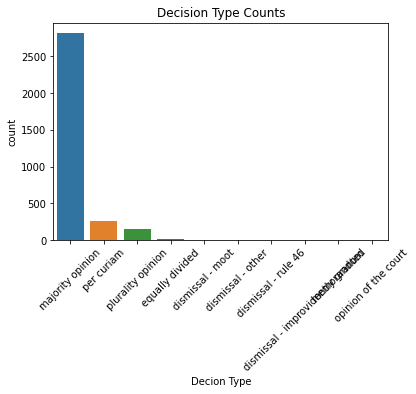

In [52]:
g=sns.countplot(x='decision_type',data=df_n)

g.set_xticklabels(g.get_xticklabels(),rotation=45) 
plt.title("Decision Type Counts")
plt.xlabel("Decion Type")
plt.show()

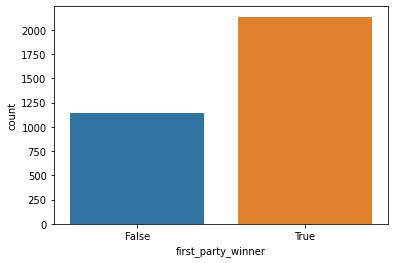

In [53]:
sns.countplot(x='first_party_winner',data=df_n)
plt.show()

In [54]:
 def remove_punctuations(text):
    translator = str.maketrans('', '', string.punctuation)
    return str(text).translate(translator)
def processRequest(requestStr): 
      
    # remove repeated letters
    requestStr=remove_punctuations(requestStr)
    
    return requestStr

In [55]:
#df_n['facts']=df_n['facts'].apply(lambda x:processRequest(x))
from bs4 import BeautifulSoup
df_n['factsc'] = [BeautifulSoup(text).get_text() for text in df_n['facts']]

In [56]:
pd.options.mode.chained_assignment = None

In [57]:
df_n['facts']=df_n['facts'].str.lower().apply(lambda x:processRequest(x))

In [58]:
df_n['facts'].head()

0                                                                                                                                                                                                                                                                        pin 1970 jane roe a fictional name used in court documents to protect the plaintiff’s identity filed a lawsuit against henry wade the district attorney of dallas county texas where she resided challenging a texas law making abortion illegal except by a doctor’s orders to save a woman’s life in her lawsuit roe alleged that the state laws were unconstitutionally vague and abridged her right of personal privacy protected by the first fourth fifth ninth and fourteenth amendmentsp\n
1    pjoan stanley had three children with peter stanley  the stanleys never married but lived together off and on for 18 years  when joan died the state of illinois took the children  under illinois law unwed fathers were presumed unfit parents regard

In [59]:
from sklearn import preprocessing
pro= preprocessing.LabelEncoder()
y=pro.fit_transform(df_n['first_party_winner'])


In [60]:
vect = TfidfVectorizer(min_df=0.0001, max_df=0.95,stop_words=stopword_list)
vect.fit(df_n.facts)            # build vocabulary
X = vect.transform(df_n.facts)  # encode the text data

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [62]:

model=DecisionTreeClassifier()
model.fit(X_train, y_train)
 
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.32      0.28      0.29       236
           1       0.62      0.67      0.64       421

    accuracy                           0.53       657
   macro avg       0.47      0.47      0.47       657
weighted avg       0.51      0.53      0.52       657



In [63]:

model=RandomForestClassifier()
model.fit(X_train, y_train)
 
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.46      0.03      0.05       236
           1       0.64      0.98      0.78       421

    accuracy                           0.64       657
   macro avg       0.55      0.50      0.41       657
weighted avg       0.58      0.64      0.52       657

